# Artificial Intelligence and Applications Course Work

# Question 1.1
The 8-puzzle problem can be seen as a search problem as you are able to represent the problem on a graph. A state of the 8-puzzle problem can be defined as a unique arrangement of all the titles on the board. Every state of the 8-puzzle can be represented as a node within a graph and each move can be represented as an edge. The problem can be represented as a search problem as to solve a given problem, you must search the graph to get from the start node to a finish node using the route as the moves you must take to arrive at the finish. From this concept, we can understand that we want the most efficent search possible meaning that we make the least moves to get from a given to start state to an end state.

# Question 1.2
## 1.2.1
Before explaining how the A* Algorithm works, I must first described some functions used by the algorithm:
- g(x): This is the cost associated with traveling from the start node to the node being currently examined, x. In the 8-puzzle, the weight of each move will be 1, however, with other problems weights between nodes may vary.
- h(x): This is the heuristic function predicting the cost from the current node to the final node. It will return a numeric value which is as close to the correct distance as possible without overshooting the value. This trait is known as a heuristic being admissible; for example, if the true distance of one node from the current one is y, then the best heuristic would be the value y. Anything lower will be acceptable but will effect the performance of the algorithm; anything greater than this value will result in the program not working and missing the quickest route to the destination node or not being able to find the end node altoghether.
- f(x): The predicted distance from the start node to the end node assuming that the current node is found in the route.<br> Represented as: g(x) + h(x)
<br><br>At any given node the A* seach algorithm will calculate all of the f-values of its neighbouring nodes other than the one that it came from. It will then visit the node with the lowest f-value and repeat this until the program reaches the destination node.

## 1.2.2
### Misplaced Squares:
The Misplaced Squares heuristic function produces a value based on the number of tiles that are not currently in the correct position. For example, if the first tile is supposed to be "1" in the goal state and it is currently a different number, the total heuristic return value will be incremented. This heuristic is admissible as if a tile is in the incorrect place, the minimum number of moves to move the correct tile to the given position will always be one or greater. I decided to choose this function as the heuristic is always admissible, the heuristic is also not as efficent as the Manhatten Distance allowing a clear comparison when I come to implement the functions.

### Manhatten Distance:
The Manhatten Distance heuristic function produces a value based on the number of moves it would take a tile to be moved to the correct position assuming there were no other tiles on the board. For example, if the tile in the top left position is supposed to be in the top right position, the value of two will be added to the total value returned by the heuristic as it would take two moves to move that tile to the correct position assuming there is nothing else on the board. This heuristic is admissible as the Manhattern Distance will always be an understimate of the number of moves requried other than when the tile is one move away. This is because to move a tile two spaces, other tiles will have to be moved to create space for the original tile to move closer to the correct destination. I choose this function as the heuristic is also always admissible, the heurstic is much more efficent than that of Misplaced Squares allowing a good comparison between the two. 

### Euclidean Distance (EXTRA): 
The Euclidean Distance heuristic function produces a value based on the straight line distance between a tile's inital position and a tile's destination position. For example, if a tile was in the top left position and the destination position of the tile was bottom middle, the number added to the total value returned by the heuristic would be would be $\sqrt{1^2 + 2^2}$ as this is the straight line distance between the two positions. This heursitic is admissible as the number of moves a tile is required to travel from one position to another will always be equal to or greated than the euclidean distance. This is because the tile is not able to move diagonally and also other tiles will be required to move out of the way. I decided not to choose this function to implement as it will always produce a lower value than the Manhattern Distance and a higher Value than the Misplaced Squares heuristic; using the other two functions allow a greater comparion of time efficency.

## 1.2.3
A defult start and end state are described below as the example given the program took to long to run with my implementation. I have selected the states so that they require 14 moves to be completed highlighting the correctness of the program.<br>
Defult Start State:<br>
1 2 3 <br>
4 0 5<br>
6 7 8<br>

Defult End State:<br>
0 1 2<br>
3 4 5<br>
6 7 8<br>

In [ ]:
import math
import time
from decimal import Decimal

## NODE CLASS ##
class Node:
    def __init__(self,state,level,heuristic,previous):
        self.state = state
        self.level = level
        self.heuristic = heuristic
        self.previous = previous

## INPUT VALIDATION ##
def stateInput(input1): 
    state = []
    state = input1.split(" ")
    return state

## FUNCTION TO CREATE A LIST OF ALL THE DIRECTIONS A TILE CAN GO IN FROM A POSITION ##
def possibleMoves(begin):
    num = begin.state.index('0')
    result = [];
    if(num % 3 != 2):
        result.append('r')
    if(num % 3 != 0):
        result.append('l')
    if(num > 2):
        result.append('u')
    if(num < 6):
        result.append('d')
    return result

## CREATES NEW STATES FROM A GIVEN STATE AND A LIST OF MOVES ##
def move(moves, start, recent):
    zeroIndex = start.state.index('0')
    buffer = 0
    new = start.state.copy()
    results = []
    if 'r' in moves:
        buffer = new[zeroIndex + 1]
        new[zeroIndex + 1] = '0'
        new[zeroIndex] = buffer
        results.append(new)
    new = start.state.copy()
    if 'l' in moves:
        buffer = new[zeroIndex - 1]
        new[zeroIndex - 1] = '0'
        new[zeroIndex] = buffer
        results.append(new)
    new = start.state.copy()
    if 'u' in moves:
        buffer = new[zeroIndex - 3]
        new[zeroIndex - 3] = '0'
        new[zeroIndex] = buffer
        results.append(new)    
    new = start.state.copy()
    if 'd' in moves:
        buffer = new[zeroIndex + 3]
        new[zeroIndex + 3] = '0'
        new[zeroIndex] = buffer
        results.append(new)
    if recent in results:
        results.remove(recent)
    return results

## FUNCTION TO PRINT A BOARD ##
def printMatrix(arrays):
    first = True
    for i in arrays:
        if not first:
            print("\n  |\n  |\n  |\n  |\n  V")    
        print("\n" + i.state[0], i.state[1], i.state[2])
        print(i.state[3], i.state[4], i.state[5])
        print(i.state[6], i.state[7], i.state[8])
        first = False

## FUNCTION FOR MISPLACED SQUARES HEURISTIC ##
def compare(start, end):
    count = 0
    for i in range(len(start)):
        if start[i] != end[i]:
            count = count + 1
    return count

## FUNCTION FOR MANHATTEN DISTANCE HEURISTIC ##
def manhatten(start, end):
    count = 0
    indexEnd = 0
    indexStart = 0
    for i in start:
        indexEnd = end.index(i)
        if abs(indexStart % 3 - indexEnd % 3) == 1:
            count = count + 1
        elif abs(indexStart % 3 - indexEnd % 3) == 2:
            count = count + 2
        if abs(math.floor(indexStart/3) - math.floor(indexEnd/3)) == 1:
            count = count + 1
        elif abs(math.floor(indexStart/3) - math.floor(indexEnd/3)) == 2:
            count = count + 2
        indexStart = indexStart + 1
    return count

## A* SEARCH ALGORITHM ##
def search(start, end, function):
    # INITIALISATION #
    timeStart = time.time()
    openList = []
    closedList = []
    adjacent = []
    openList.append(start)
    recent = 0
    
    # WHILE LOOP FOR PROGRAM #
    while(len(openList) != 0):
        currentNode = openList[0]
        
        # CHECK IF CURRENT NODE IS IN OPEN LIST AND IF G-VALUE IS LESS#
        for i in openList:
            if (i.heuristic + i.level) < (currentNode.heuristic + currentNode.level):
                currentNode = i
        openList.remove(currentNode)
        closedList.append(currentNode)
        
        # CHECK TERMINATION CRITERIA #
        if currentNode.state == end:
            print("\nThe problem was solved in " + str(currentNode.level) + " moves")
            timeEnd = time.time()
            final = timeEnd - timeStart
            final = Decimal(final)
            final = round(final, 4)
            print("The time taken for the the program to execute was " + str(final) + " seconds")
            route = []
            tell = False
            while tell == False:
                if currentNode != 3:
                    route.append(currentNode)
                    currentNode = currentNode.previous
                else:
                    tell = True
            return route[::-1]
        
        # CREATE NEW STATES FROM CURRENT STATE #
        moves = possibleMoves(currentNode)
        children = move(moves, currentNode, recent)
        
        # CHECK IF CHILDREN STATES ARE IN CLOSED LIST AND IF NOT APPENDS THEM TO OPEN LIST IF THEY HAVE A LOW G-VALUE #
        for i in children:
            found = False
            for q in closedList:
                if i == q.state:
                    found = True
            if found == False:
                gValue = currentNode.level + 1
                if function == '0':
                    hValue = manhatten(i, end)
                elif function == '1':
                    hValue = compare(i, end)
                fValue = gValue + hValue
                newNode = Node(i, gValue, fValue, currentNode)
                openState = False
                for x in openList:
                    if newNode.state == x.state:
                        openState = True
                        saved = x
                if openState == True:
                    if newNode.level < x.level:
                        continue
                openList.append(newNode)

## INPUT VALIDATION AND PROGRAM SET UP ##
correctStart = False
correntEnd = False
correctHeuristic = False
while(correctStart == False):
    print("Please input START state with a 0 in the empty location separated by spaces \nIf nothing entered then example of ['1', '2', '3', '4', '0', '5', '6', '7', '8'] will be used:")
    start = input()
    if start == "":
        start = ['1', '2', '3', '4', '0', '5', '6', '7', '8']
    else:
        start = stateInput(start)
    if(len(start) == 9):
        correctStart = True
    else:
        print("ERROR INCORRECT FORMAT")

while(correntEnd == False):
    print("Please input END state with a 0 in the empty location separated by spaces \nIf nothing entered then example of ['0', '1', '2', '3', '4', '5', '6', '7', '8'] will be used:")
    end = input()
    if end == "":
        end = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
    else:
        end = stateInput(end)
    if(len(end) == 9):
        correntEnd = True
    else:
        print("ERROR INCORRECT FORMAT")
        
while(correctHeuristic == False):
    print("Please enter HEURISTIC FUNCTION to use: '0' for Manhattern Distance or '1' for Misplaced Tiles")
    function = input()
    if function == '0':
        heuristic = manhatten(start, end)
    elif function == '1':
        heuristic = compare(start, end)
    if function == '1' or function == '0':
        correctHeuristic = True
    else:
        print("ERROR INCORRECT FORMAT")

print("CALCULATING...")
## FUNCTION CALLS ##
startNode = Node(start, 0, heuristic, 3)
printMatrix(search(startNode, end, function))


## 1.2.4
From the figures below, it is clear that Manhatten Distance is a far superior heuristic compared to that of Misplaced Squares when the solution and intial state are more than 9 moves away within the graph. When the start and end state are close together, Misplaced Squares can been more efficent as there is a lower overhead associated with computing the heuristic for Misplaced Squares. Manhatten Distance is better as the value it produces will usually be higher whilst still remaining admissable. As a result of this certain paths in the graph will not be explored which may be explored using Misplaced Squares making the program much more efficent. For the figures below I ran the program with 20 different start states of different moves away from the goal state and recorded the time in seconds that it took for the program to execute. I would have liked to run tests higher than 20 moves however my computer is unable to handle Misplaced Squares any higher than this. I then plotted these results in a graph, however I decided to exclude the last two values as these results made the graph much harder to read as the time taken had a much larger range.

| Moves | Time for Manhatten Distance (S) | Time for Misplaced Squares (S) |
| ----------- | :----------: | :----------: |
| 1 | 0.0002 | 0.0001 |
| 2 | 0.0002 | 0.0001 |
| 3 | 0.0002 | 0.0001 |
| 4 | 0.0005 | 0.0003 |
| 5 | 0.0006 | 0.0003 |
| 6 | 0.0005 | 0.0004 |
| 7 | 0.0010 | 0.0008 |
| 8 | 0.0017 | 0.0014 |
| 9 | 0.0027 | 0.0039 |
| 10 | 0.0042 | 0.0074 |
| 11 | 0.0104 | 0.0204 |
| 12 | 0.0153 | 0.0265 |
| 13 | 0.0252 | 0.0740 |
| 14 | 0.0312 | 0.1302 |
| 15 | 0.0653 | 0.3728 |
| 16 | 0.1062 | 0.7645 |
| 17 | 0.2061 | 2.6453 |
| 18 | 0.3306 | 4.9871 |
| 19 | 0.8056 | 15.7045 |
| 20 | 1.2977 | 31.4733 |

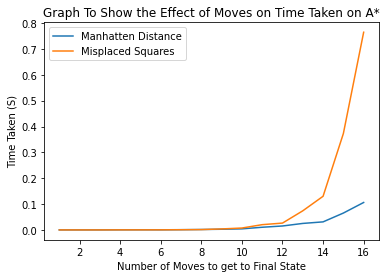

In [128]:
import matplotlib.pyplot as plt
   
move = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
time1 = [0.0002,0.0002,0.0002,0.0005,0.0006,0.0005,0.0010,0.0017,0.0027,0.0042,0.0104,0.0153,0.0252,0.0312,0.0653,0.1062]
time2 = [0.0001,0.0001,0.0001,0.0003,0.0003,0.0004,0.0008,0.0014,0.0039,0.0074,0.0204,0.0265,0.0740,0.1302,0.3728,0.7645]
  
plt.plot(move, time1, label = "Manhatten Distance")
plt.plot(move, time2, label = "Misplaced Squares")
plt.title('Graph To Show the Effect of Moves on Time Taken on A*')
plt.xlabel('Number of Moves to get to Final State')
plt.ylabel('Time Taken (S)')
plt.legend();
plt.show()

# Question 1.3
As you can see, I have implemented the answer to this question in question 1.2.3 allowing the user to enter any start and end state along with a choice of heuristic function. Theoretically, the program is only able to solve half of the possible start and end solution states. This is due to the number of inversions of half of the possible start and end grids being an odd number. If this number is odd, the problem is unsolvable; an inversion is defined as a tile being found after a different tile it should be before in the list. For example, with the demo state given in the question, there is a inversion in the first two tiles as 7 is found before 2 but in the solution it should be found after two. If you sum the number of inversions in a problem and it is even, the problem is solvable and if it is odd, the problem is unsolvable. 

# Question 2.1

## 2.1.1

A)<br>
For the solution space I have decided to have a single list that will store all of the values within a sudoku table reading from left to right one column at a time. I believe that this is the best soultion rather than a 2D list as there are multiple ways in which you could group values. E.g. Row, Column, Square. For the solution representation I will have a function which will return a string of the board's representation given a genotype list input. This board will be similar to that of the grids given to us to run our tests with.

B)<br>
For the fitness function I have decided to create a function which returns a value corresponding with the number of repeated values within a horizontal row, a vertical column, or a square. If the sudoku is perfect, it will return 0; 1 will then be added per repeat within a row, column or square meaning the higher the value, the less optimal solution. This function provides a wide distribution of fitnesses allowing the user to see more clearly the progression of the algorithm and also allows a selection function to better choose the optimal solutions. I origionally thought about a fitness function where if a row, column or square was incorrect, 1 will be added to the total. This function did not take into account to what extent a row was incorrect. Was it one value out or was the whole row filled with the same number? That function would also produce a much lower fitness value making it harder for a selection function to determine which populations to delete.

C)<br>
For the crossover operator, I will create a function which randomly chooses two of the populations after they have undergone a a selection function. The function will then iterate through each individual location in the list and randomly choose a value from either list appending it to the resulting solution. 

D)<br>
For the mutation operator, I will create a function which chooses a random location in the board and, provided that it is not a location of a perminent value, randomly changes the value to another number. This will be repeated a given amount of times dependant on the mutation rate. The mutation rate will be variable depening on the original board inputted. The rate will always be the reciprocal of the number of empty spaces on the board. This means that, on avergage, only one value in the board will be changed per an iteration of the mutation function. 

E)<br>
To initialise the population I have decided to replace all of the empty fields within the Sudoku table with a random integer from one to nine. This provides a truly random initial board for the Evolutionary Algorithm to work over. I also considered the possibility of initialising the board with only 9 of each character meaning that there will be the correct number of each character in the grid to begin with. I decided against this as I was more interested to see how the Evolutionary Algorithm ran with as little guidance as possible. If I were to implement this method I would then create a mutation function which, rather than changing an individual number randomly, swaps the numbers in two possitions randomly maintaining the integrity of the board.

F)<br>
For selection and replacement methods, the user will be able to edit a truncation rate which will be the proportial rate of how many of the best fitted soultions are chosen from a generation to then undergo the rest of the Evolutionary Algorithm (crossover and mutation). I have decided to use a full replacement method which will not include any of the previous generations solutions, even if they have a lower fitness value, as I once again was more interested in seeing what a unguided Evolutionary Algorithm could achieve. However, it seems that a partial replacement method which takes the best solutions from a combination of the current generation and the previous generation would be more efficent.  

G)<br>
For the termination criteria the user will be able to change the number generation which will be the number of iterations the Evolutionary Algorithm will run for. If the fitness value of a solution ever reaches 0 then the program will also stop running as the correct answer has been reached. 

## 2.1.2

In [ ]:
#
# SUDOKU EVOLUTIONARY ALGORITHM  
#

from random import choice, random

### EVOLUTIONARY ALGORITHM ###

def evolve():
    population = create_pop()
    lowest = 1000
    fitness_population = evaluate_pop(population)
    for gen in range(NUMBER_GENERATION):
        mating_pool = select_pop(population, fitness_population)
        offspring_population = crossover_pop(mating_pool)
        population = mutate_pop(offspring_population)
        fitness_population = evaluate_pop(population)
        best_ind, best_fit = best_pop(population, fitness_population)
        best_ind = printSolutions(best_ind)
        if best_fit < lowest:
            lowest = best_fit
        print("#%3d" % (gen+1), "fit:%3d" % best_fit, "".join(best_ind))
        if best_fit == 0:
            break
    print("Lowest fitness: " + str(lowest))
    
### POPULATION LEVEL-LEVEL OPERATORS ###
## FUNCTION TO RETURN (POPULATION_SIZE) OF RANDOM BOARDS ##
def create_pop():
    return [ create_ind() for _ in range(POPULATION_SIZE) ]

## FITNESS FUNCTION TO RETURN A LIST OF FITNESSES FOR ALL GRIDS IN A POPULATION ##
def evaluate_pop(population):
    return [ evaluate_ind(individual) for individual in population ]

## FUNCTION TO RETURN ONLY THE MOST FIT GRIDS OF A POPULATION ACCORDING TO (TRUNCATION_RATE) ##
def select_pop(population, fitness_population):
    sorted_population = sorted(zip(population, fitness_population), key = lambda ind_fit: ind_fit[1])
    return [ individual for individual, fitness in sorted_population[:int(POPULATION_SIZE * TRUNCATION_RATE)] ]

## FUNCTION TO RETURN (POPULATION_SIZE) OF CROSSOVERED SOLUTIONS ##
def crossover_pop(population):
    return [ crossover_ind(choice(population), choice(population)) for _ in range(POPULATION_SIZE) ]

## FUNCTION TO RETURN A MUATATED LIST OF SOLUTIONS ##
def mutate_pop(population):
    return [ mutate_ind(individual) for individual in population ]

## FUNCTION TO RETURN THE BEST A SORTED LIST OF A GRID AND ITS ASSOCIATED FITNESS)
def best_pop(population, fitness_population):
    return sorted(zip(population, fitness_population), key = lambda ind_fit: ind_fit[1])[0]

### INDIVIDUAL-LEVEL OPERATORS: ###
alphabet = [1,2,3,4,5,6,7,8,9]

## CREATES A RANDOM BOARD ##
def create_ind():
    temp = []
    for i in range(81):
        if BOARD[i] == 0:
            temp.append(choice(alphabet))
        else:
            temp.append(BOARD[i])
    return temp
            
## RETURNS THE FITNESS VALUE FO A GIVEN BOARD ##
def evaluate_ind(individual):
    return(evaluate_square(individual) + evaluate_row(individual) + evaluate_column(individual))

## EVALUATES THE SQUARES WITHIN A GIVEN BOARD ##
def evaluate_square(individual):
    count = 0
    total = 0
    for _ in range(9):
        check = []
        language = [1,2,3,4,5,6,7,8,9]
        for i in range(3):
            check.append(individual[count+i])
            check.append(individual[count+9+i])
            check.append(individual[count+18+i])
        for i in range(len(check)):
            if check.count(check[i]) > 1 and check[i] in language:
                total = total + check.count(check[i]) - 1
                language.remove(check[i])
        if count % 9 != 6:
            count += 3
        else:
            count += 21
    return total

## EVALUATES THE COLUMNS WITHIN A GIVEN BAORD ## 
def evaluate_column(individual):
    total = 0
    for x in range(9):
        check = []
        language = [1,2,3,4,5,6,7,8,9]
        for i in range(0, 73, 9):
            check.append(individual[x+i])
        for i in range(len(check)):
            if check.count(check[i]) > 1 and check[i] in language:
                total = total + check.count(check[i]) - 1
                language.remove(check[i])
    return total

## EVALUATES THE ROWS WITHIN A GIVEN BOARD ##
def evaluate_row(individual):
    count = 0
    total = 0
    for _ in range(9):
        check = []
        language = [1,2,3,4,5,6,7,8,9]
        for i in range(9):
            check.append(individual[count+i])
        for i in range(len(check)):
            if check.count(check[i]) > 1 and check[i] in language:
                total = total + check.count(check[i]) - 1
                language.remove(check[i])
        count+=9
    return total

## CROSSOVER TWO GIVEN GRIDS ##
def crossover_ind(individual1, individual2):
    return [ choice(ch_pair) for ch_pair in zip(individual1, individual2) ]

## MUTATES A GIVEN GRID DEPENDANT ON (MUTATION_RATE)
def mutate_ind(individual):
    for i in range(len(individual)):
        if random() < MUTATION_RATE:
            if BOARD[i] == 0:
                individual[i] == choice(alphabet)
    return individual


## FUNCTION TO RETURN THE BOARD WITH THE BEST FITNESS ##
def best_pop(population, fitness_population):
    return sorted(zip(population, fitness_population), key = lambda ind_fit: ind_fit[1])[0]

## FUNCTION TO PRINT THE SOLUTION WHEN PROGRAM HAS FINISHED ##
def printSolutions(results):
    string = ""
    for y in range(len(results)):
        if y % 3 == 0 and y % 9 !=0:
            string = string + " ! " + str(results[y])
        else:
            string = string + str(results[y])
        if y % 9 == 8:
            string = string + "\n"
        if y % 27 == 26 and y != 80:
            string = string + "--- ! --- ! ---\n"
    return "\n" + string
    
### GRID SELECTION ###
print("Please enter grid number: (1,2 or 3)")
grid = input()
if grid == "1":
    BOARD = [3,0,0,0,0,5,0,4,7,0,0,6,0,4,2,0,0,1,0,0,0,0,0,7,8,9,0,0,5,0,0,1,6,0,0,2,0,0,3,0,0,0,0,0,4,8,1,0,0,0,0,7,0,0,0,0,2,0,0,0,4,0,0,5,6,0,8,7,0,1,0,0,0,0,0,3,0,0,6,0,0]
elif grid == "2":
    BOARD = [0,0,2,0,0,0,6,3,4,1,0,6,0,0,0,5,8,0,0,0,7,3,0,0,2,9,0,0,8,5,0,0,1,0,0,6,0,0,0,7,5,0,0,2,3,0,0,3,0,0,0,0,5,0,3,1,4,0,0,2,0,0,0,0,0,9,0,8,0,4,0,0,7,2,0,0,4,0,0,0,9]
elif grid == "3":
    BOARD = [0,0,4,0,1,0,0,6,0,9,0,0,0,0,0,0,3,0,0,5,0,7,9,6,0,0,0,0,0,2,5,0,4,9,0,0,0,8,3,0,6,0,0,0,0,0,0,0,0,0,0,6,0,7,0,0,0,9,0,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0]
else:
    print("ERROR WRONG INPUT")

### PARAMERS VALUES ###
NUMBER_GENERATION = 100
POPULATION_SIZE = 10000
TRUNCATION_RATE = 0.5
MUTATION_RATE = 1.0 / BOARD.count(0)

### EVOLVE ###
evolve()


### Results
Tables to show Best Fitness Reached by each grid at different populations sizes.
#### Grid 1:

| Population Size | Repeat 1 | Repeat 2 | Repeat 3 | Repeat 4 | Repeat 5 | Average |
| ---------- | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 10 | 71 | 51 | 57 | 65 | 56 | 60.0 |
| 100 | 22 | 20 | 20 | 23 | 21 | 21.2 |
| 1,000 | 8 | 8 | 2 | 4 | 8 | 6.0 |
| 10,000 | 0 | 2 | 3 | 2 | 0 | 1.4 |

#### Grid 2:

| Population Size | Repeat 1 | Repeat 2 | Repeat 3 | Repeat 4 | Repeat 5 | Average |
| ---------- | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 10 | 54 | 58 | 61 | 50 | 52 | 55.0 |
| 100 | 22 | 21 | 14 | 18 | 19 | 18.8 |
| 1,000 | 5 | 2 | 6 | 5 | 3 | 4.2 |
| 10,000 | 0 | 0 | 2 | 2 | 2 | 2.0 |

#### Grid 3:

| Population Size | Repeat 1 | Repeat 2 | Repeat 3 | Repeat 4 | Repeat 5 | Average |
| ---------- | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 10 | 63 | 61 | 58 | 63 | 57 | 60.4 |
| 100 | 27 | 24 | 25 | 25 | 24 | 25.0 |
| 1,000 | 4 | 8 | 9 | 14 | 13 | 9.6 |
| 10,000 | 2 | 4 | 3 | 9 | 6 | 4.8 |


#### Average:

|  | Grid 1 | Grid 2 | Grid 3 |
| ----------- | :----------: | :----------: | :----------: |
| 10 | 60.0 | 55.0 | 60.4 |
| 100 | 21.2 | 18.8 | 25.0 |
| 1,000 | 6.0 | 4.2 | 9.6 |
| 10,000 | 1.4 | 2.0 | 4.8 |

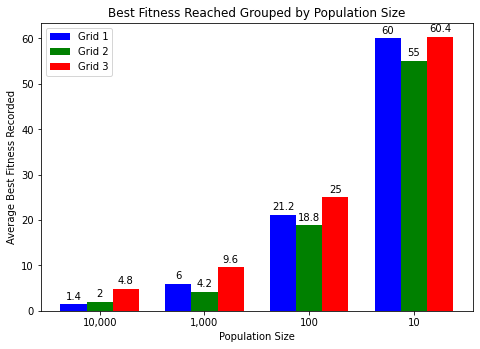

In [133]:
import numpy as np
import matplotlib.pyplot as plt
data = [[1.4, 6.0, 21.2, 60.0],
[2.0, 4.2, 18.8, 55.0],
[4.8, 9.6, 25.0, 60.4]]
X = np.arange(4)
fig = plt.figure()
ind = np.arange(4)
ax = fig.add_axes([0,0,1,1])
first = ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
second = ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
third = ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['Grid 1', 'Grid 2', 'Grid 3'])
ax.set_xticks((ind+0.25), ('10,000', '1,000', '100', '10'))
ax.bar_label(first, padding=3)
ax.bar_label(second, padding=3)
ax.bar_label(third, padding=3)
ax.set_ylabel('Average Best Fitness Recorded')
ax.set_xlabel('Population Size')
ax.set_title('Best Fitness Reached Grouped by Population Size')

plt.show()

# Question 2.2
## 2.2.1
The best population size for correctness was 10,000. The results show that the greater the population size, the closer you get to the correct solution. However, whilst increasing the population size is beneficial for getting closer to the correct solution, it also takes the program much longer to execute and is a much more expensive calculation. This trade off between accuracy and speed is one seen often in Artificial Intelligence problems and will slowly get better overtime as compute power increases.

## 2.2.2
The reason that 10,000 was the best population size was that it produced the largest population each generation for the selection function to choose from. After selection occured, the crossover function produced another new 10,000 solutions which then could undergo mutation the most times increasing the chances of a more optimal solution being produced. With lower population sizes, a smaller number of possible solutions were produced each generation undergoing crossover and mutation therefore decreasing the chance of a good soultion being produced. 

## 2.2.3

As seen by the results, the grid that was easiest for the Evolutionary Algorithm to solve was grid 1 with an average lowest fitness of 1.4 when ran with population size 10,000. Following this was grid 2 with the average lowest fitness for 10,000 population size of 3.0; after this was grid 3 with 4.4 for the same population size. Contrasting to this, when ran with all other population sizes, grid 2 had the lowest Average Best Fitness. It returned 55.0 with population size 10 compaired to that of approximately 60 for grid 1 and grid 3. 

## 2.2.4

The reason for the second grid being the easiest for the algorithm to solve with all population sizes other than 10,000 was that it has the greatest number of fixed values within the origional board: 33. This was closely followed by grid 1 with 29 and then grid 3 with 33. These values explain the order of solutions for all population sizes other than 10,000 in which grid 1 had a lower Average Best Fitness compared to that of grid 2. For 10,000 population size perhaps there was an anomily and we would find that grid 2 would indeed have a lowever Average Best Fitness if the experiment was repeated more times. 

## 2.2.5

There are many further experiments that may be useful to analyses the Evolutionary Algorithm that I have presented. One of these may be changing the truncation rate. For all the tests spoken about the truncation rate was set at 0.5 however I am unsure that this is optimal. It may be useful to run the tests again with varying truncation rates rather than varying Sudoku grids. Furthermore, it would also be interesting to repeat the same experiment varying the population size but rather than having the dependant variable being the best fitness reached, it being the time taken to reach 0. This experiment would further allow us to see which grids are the most optimal and how increasing population size effects time taken to execute. However, this experiment would be hard to conduct as each system that the algorithm is run on will produce different values due to different hardware and software specifications. Furthermore, if you run the algorithm on the same computer, this may still not be representative of the time taken dependant on what background process are running whilst the program is executing.

Another useful experiment may be varying the number generation with a fixed population size to see if the number generation has the same effect as population size. I was able to carry out this experiment; I decided to use the fixed population size of 100 as anything higher than this would have taken to long to compute. Below are the results:

### Results

#### Grid 1:

| Number Generation | Repeat 1 | Repeat 2 | Repeat 3 | Repeat 4 | Repeat 5 | Average |
| ---------- | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 10 | 47 | 46 | 52 | 48 | 50 | 48.6 |
| 100 | 27 | 26 | 21 | 31 | 19 | 24.8 |
| 1,000 | 27 | 24 | 27 | 27 | 22 | 25.4 |

#### Grid 2:

| Number Generation | Repeat 1 | Repeat 2 | Repeat 3 | Repeat 4 | Repeat 5 | Average |
| ---------- | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 10 | 41 | 48 | 45 | 44 | 45 | 44.6 |
| 100 | 23 | 22 | 24 | 24 | 24 | 23.4 |
| 1,000 | 17 | 27 | 20 | 23 | 17 | 20.8 |

#### Grid 3:

| Number Generation | Repeat 1 | Repeat 2 | Repeat 3 | Repeat 4 | Repeat 5 | Average |
| ---------- | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 10 | 53 | 53 | 53 | 52 | 56 | 53.4 |
| 100 | 19 | 29 | 27 | 23 | 27 | 25.0 |
| 1,000 | 27 | 22 | 22 | 25 | 25 | 24.2 |


#### Average:

| Number Generation | Grid 1 | Grid 2 | Grid 3 |
| ----------- | :----------: | :----------: | :----------: |
| 10 | 48.6 | 44.6 | 53.4 |
| 100 | 24.8 | 23.4 | 25.0 |
| 1,000 | 25.4 | 20.8 | 24.2 |

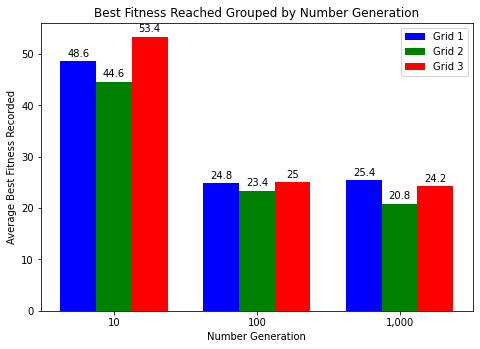

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = [[48.6, 24.8, 25.4],
[44.6, 23.4, 20.8],
[53.4, 25.0, 24.2]]
X = np.arange(3)
fig = plt.figure()
ind = np.arange(3)
ax = fig.add_axes([0,0,1,1])
first = ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
second = ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
third = ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['Grid 1', 'Grid 2', 'Grid 3'])
ax.set_xticks((ind+0.25), ('10', '100', '1,000'))
ax.bar_label(first, padding=3)
ax.bar_label(second, padding=3)
ax.bar_label(third, padding=3)
ax.set_ylabel('Average Best Fitness Recorded')
ax.set_xlabel('Number Generation')
ax.set_title('Best Fitness Reached Grouped by Number Generation')
plt.show()

When conducting this experiment I was hoping to have 4 number generations with the same values similar to that of the experiment with population size. However, upon attempting to run the tests with number generation 10,000, I found that the experiment took to long to run for all the grids. As you can see from the results, Number Generation has a much smaller effect than that of Population Size. Between 10 and 100 Number Generation the trend is similar to that of Population Size with a similar decrease in Average Best Fitness Recorded; however, following this with a Number Generation of 1,000 the trend does not continue with the values staying approximately the same and even increasing in some circumstances. From the results of this experiment it is clear that the Population Size does have a greater impact on the Average Best Fitness Recorded rather than the Number Generation. Nevertheless, we cannot extrapolate and assume that this trend continues for 10,000 Number Generation. The Best Fitness Recorded may possibly be better with a Number Generation of 10,000 compared to that of a Population Size of 10,000. <br>All of the trials for this experiment were run with the same parameters of that of the first experiment with a constant Population Size of 100. In conclusion, it seems that Population Size has a greater effect on the Average Best Fitness Recorded however as Population Size is increased, Number Generation could also be increased to prevent Number generation becomming the limiting factor late on in the Evolutionary Algorithm.